# Homework 5: An External Forcing Experiment

Name: 

Date: 

#### Overview
In class, we set up the MITgcm `global_ocean_ebm` configuration with the `exf` package to run on MITgcm. In this assignment, we will assess the output of this model configuration. 

To begin, import the Python modules for manging and plotting data, and making movies. Then, define a path to your homework 5 directory. Finally, the `diags` folder on Spartan to your local machine.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

In [4]:
diags_dir = 'diags/'

### Part 1: Choose Variables to Examine 
In this assignment, you'll investigate the relationship between a state variable (temperature, salinity, or velocity) and an associated forcing variable (heat flux, freshwater flux, or wind stress). 

In the markdown cell below, indicate which pair of variables you're going to investigate.

I plan to investigate heat flux and salinity

### Part 2: Make a Movie
Next, make a movie for your variables of interest. The movie should show your state variable in one panel and your forcing variable in another panel. If you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [9]:
def plot_frame(EXF_data_path, surf_data_path, image_path):
    # make a figure object
    
    fig = plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    # plot the field
    EXF_grid = np.fromfile(EXF_data_path, '>f4').reshape(4,40, 90)
    heatflux = EXF_grid[2, :, :]

    # plot the uvel field
    plt.pcolormesh(heatflux, cmap='seismic', vmin = -200, vmax = 200)
    
    # add a colorbar
    plt.colorbar(label = 'W/m^2')
    # read in the data
    
    # format the axes
    plt.ylabel('Model Rows')
    plt.xlabel('Model Cols')
    plt.title('Qnet')
  
    
    plt.subplot(1,2,2)
    # plot the field
    surf_grid = np.fromfile(surf_data_path, '>f4').reshape(2,40, 90)
    salt = surf_grid[1, :, :]

    # plot the uvel field
    plt.pcolormesh(salt, cmap='seismic', vmin = 31, vmax = 37)
    
    # add a colorbar
    plt.colorbar(label = 'psu')
    
    # format the axes
    plt.ylabel('Model Rows')
    plt.xlabel('Model Cols')
    plt.title('Salinity')

    
    plt.tight_layout()
    plt.savefig(image_path)
    plt.close(fig)
   

In [11]:
file_list = []

for day in range(10, 630,20):  
    # build file paths
    EXF_data_path = os.path.join(diags_dir,'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')
    image_path = os.path.join(diags_dir, 'Plots', 'frames', 'frames.'+'{:010d}'.format(day)+'.png')
    surf_data_path = os.path.join(diags_dir, 'diagSURF', 'diagSURF.'+'{:010d}'.format(day)+'.data')

    # append image path
    plot_frame(EXF_data_path, surf_data_path, image_path)

    # Add to file list for video
    file_list.append(image_path)

# set frames per second for video
fps = 5


In [13]:

# use the ImageSequenceClip module to set up the clip
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)

# write the video to a file
output_file = os.path.join(diags_dir, 'salinity_heatflux_movie.mp4')
clip.write_videofile(output_file)

Moviepy - Building video diags/salinity_heatflux_movie.mp4.
Moviepy - Writing video diags/salinity_heatflux_movie.mp4



Moviepy - Done !
Moviepy - video ready diags/salinity_heatflux_movie.mp4


Change in heat flux is strongly linked to seasonality with an oscilllation between summer and winter in the northern and southern hemisphere. Salinity, is linked to heat flux as solar radiation leads to evaporation, which can increase the salt content of the water. Despite this, salinity does not exhibit as strong of a seasonality. In my video there appears to be a change in the longitudtinal gradient of salinity while heat flux changes most sharply in the latitudinal direction.

*Edit this markdown cell and enter your observations here*

### Part 3: Plot Time Series at a Location
Based on your movie, choose an interesting place in your model domain and create a timeseries of your variables at this location. There should be two plots - either as two horizontal subplots (one for each variable), or one plot with two separate y-axes for the different variables.

Again you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [18]:
delX = 4
delY = 4
xgOrigin = -80
ygOrigin = 0
n_rows = 40
n_cols = 90

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

In [19]:
# read in the XC and YC fields
XC_file = 'XC.data'
XC_grid = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))
YC_file ='YC.data'
YC_grid = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

In [20]:
# define the lon/lat point
lon = 291
lat = 37

# find its location in the grid
dist = ((XC -lon)**2 + (YC -lat)**2)**0.5
#row, col = np.where(dist==np.min(dist))
row,col = (32,78)

Day 10: Qnet = 210.9583282470703, Salt = 34.37187957763672
Day 30: Qnet = 216.59263610839844, Salt = 34.289859771728516
Day 50: Qnet = 203.4853515625, Salt = 34.195613861083984
Day 70: Qnet = 189.39166259765625, Salt = 34.05235290527344
Day 90: Qnet = 175.29795837402344, Salt = 34.09358215332031
Day 110: Qnet = 139.45738220214844, Salt = 34.07793045043945
Day 130: Qnet = 102.47223663330078, Salt = 34.00464630126953
Day 150: Qnet = 65.4870834350586, Salt = 33.93727111816406
Day 170: Qnet = 26.471120834350586, Salt = 33.871028900146484
Day 190: Qnet = -12.651724815368652, Salt = 33.87171173095703
Day 210: Qnet = -51.77457046508789, Salt = 33.82612228393555
Day 230: Qnet = -74.33821105957031, Salt = 33.77234649658203
Day 250: Qnet = -95.06193542480469, Salt = 33.73113250732422
Day 270: Qnet = -115.7856674194336, Salt = 33.71560287475586
Day 290: Qnet = -131.07125854492188, Salt = 33.706546783447266
Day 310: Qnet = -145.39715576171875, Salt = 33.68181228637695
Day 330: Qnet = -159.72306823

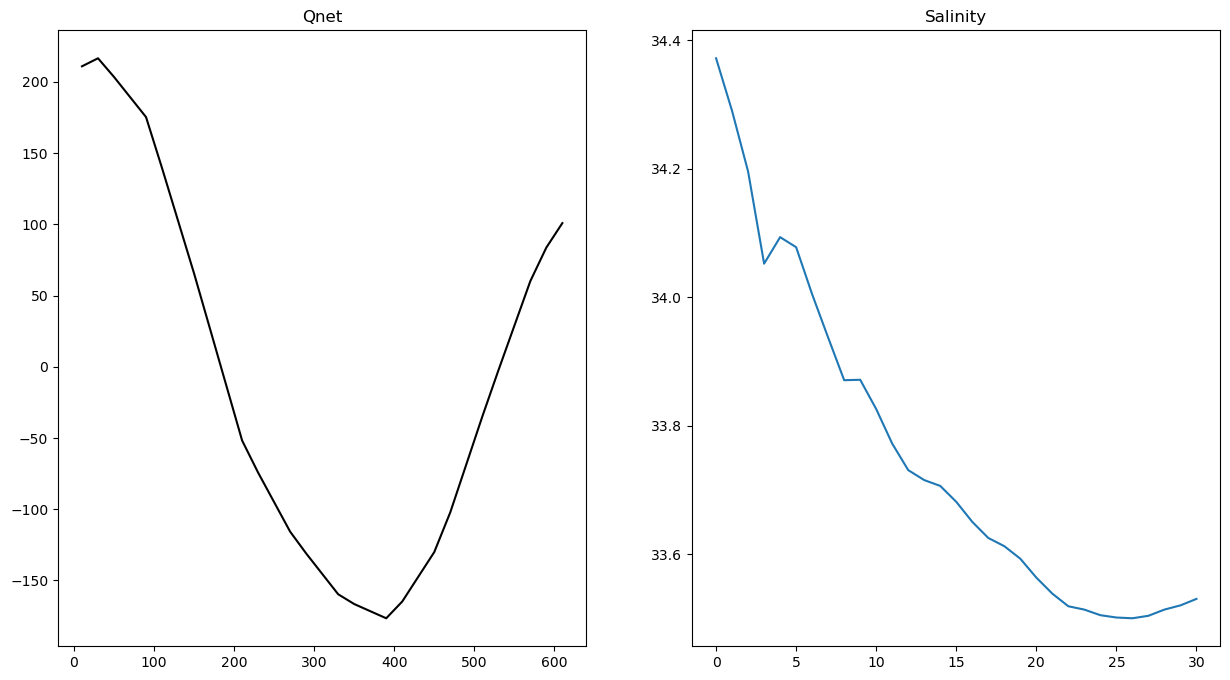

In [21]:
# make an empty array
heatflux_timeseries = []
salt_timeseries = []
for day in range(10,630,20):    
    # identify the data file path
    EXF_data_path = os.path.join(diags_dir,'diagsEXF', 'diagsEXF.'+'{:010d}'.format(day)+'.data')
    EXF_grid = np.fromfile(EXF_data_path, '>f4').reshape(4,40, 90)
    heatflux = EXF_grid[2, :, :]
    surf_data_path = os.path.join(diags_dir, 'diagSURF', 'diagSURF.'+'{:010d}'.format(day)+'.data')
    surf_grid = np.fromfile(surf_data_path, '>f4').reshape(2,40, 90)
    salt = surf_grid[1,:,:]
    print(f"Day {day}: Qnet = {heatflux[row, col]}, Salt = {salt[row, col]}")
    heatflux_timeseries.append(heatflux[row, col])
    salt_timeseries.append(salt[row, col])

days = list(range(10, 630, 20))
heatflux_timeseries = np.array(heatflux_timeseries)
salt_timeseries = np.array(salt_timeseries)

fig = plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Qnet')
plt.plot(days, heatflux_timeseries, 'k-')
plt.subplot(1,2,2)
plt.plot(salt_timeseries)  
plt.title('Salinity')

print(f"Day {day}: Qnet = {heatflux[row, col]}, Salt = {salt[row, col]}")

Comment on any features you observe in your timeseries. Place particular focus on the potential connection(s) between your state variable and the forcing. Is there anything you observe in your timeseries that you didn't catch by eye in your movie?

The point I chose is just north of the coast of Maine. This timeseries might suggests that qnet and salinity are positively correlated, possibly with some delay in the response of salinity. Although higer gnet leads to increased evaportation and higher salinities, this doesnt seem realistic to me since I wouldn't expect this lag when looking at these longer timescales? Additionally, Maine is pretty far north glacial melting might act as a nonsignificant source of fresh water in the summer, which doesnt seem to be reflected here.